In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/%D0%92%D0%B5%D1%81%D0%B5%D0%BD%D0%BD%D0%B8%D0%B9%20%D1%81%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/%D0%9A%D0%BE%D0%BB%D0%BB%D0%BE%D0%BA%D0%B2%D0%B8%D1%83%D0%BC/bestsellers%20with%20categories.csv")
# df=df.drop(columns=['Name',"Author"])

In [116]:
print("len_name",len(df["Name"].unique()))
print("len_author",len(df["Author"].unique()))
print("len_df",len(df))

len_name 351
len_author 248
len_df 550


In [117]:
df=df.drop(columns=['Name',"Author"])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [118]:
df=pd.get_dummies(df,"Genre")

In [119]:
df.head(550)

,User Rating,Reviews,Price,Year,Genre_Fiction,Genre_Non Fiction
0,4.7,17350,8,2016,0,1
1,4.6,2052,22,2011,1,0
2,4.7,18979,15,2018,0,1
3,4.7,21424,6,2017,1,0
4,4.8,7665,12,2019,0,1
...,...,...,...,...,...,...
545,4.9,9413,8,2019,1,0
546,4.7,14331,8,2016,0,1
547,4.7,14331,8,2017,0,1
548,4.7,14331,8,2018,0,1


In [150]:
df.iloc[545:549][["User Rating","Price"]]
# df[["User Rating","Price"]].loc[545:548]
# df.iloc[3:5]

,User Rating,Price
545,4.9,8
546,4.7,8
547,4.7,8
548,4.7,8


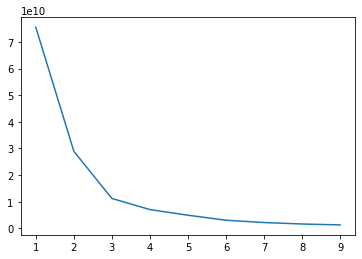

In [85]:
from sklearn.cluster import KMeans
SSE = [] 
for k in range(1,10):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,10), SSE);
plt.show()
#оптимально 4 кластера, потому что график в этой точке становится более плавным 

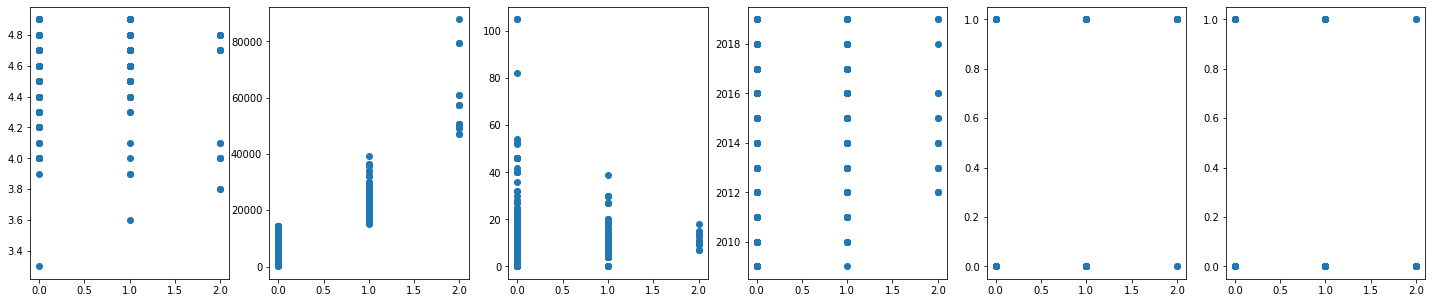

In [131]:
model=KMeans(n_clusters=3)
model.fit(df)
#model.predict(df)
# plt.plot(model.predict(df))
column=df.columns.tolist()
fig,ax =plt.subplots(1,len(column),figsize=(25,5))
for i in range(len(column)):
  ax[i].scatter(model.predict(df).tolist(),df[column[i]])